# Finch Carr Homework 3
## *Problem 1*
- I want to compare two truth tables that compare the categorizations of photos by two different Neural Networks against a person
### Problem 1A)
- I want to know which algorithm between the two tables has made the fewest errors.
  - The first table, TableA, sorted 3 birds as people and 5 people as birds
    - This is a total of 8 mistakes by the first neural network, AlgorithmA
  - The second table, TableB, sorted 1 bird as a person, and 11 people as birds
    - This is a total of 12 mistakes by the second neural network, AlgorithmB
- **Answer**: AlgorithmA made the fewest total mistakes
### Problem 1B)
- Since the two possible misidentification routes are weighted in terms of importance in an unequal manner, I can say that the misidentification of a true bird as a categorized person by any algorithm is the key mistake to analyze to determine which algorithm is better for the zoo
  - AlgorithmA incorrectly identified 5/48 birds as people that it would hypothetically allow to leave freely from the bird exhibit
  - AlgorithmB incorrectly identified 11/48 birds as people that it would hypothetically allow to leave freely from the bird exhibit
- **ANSWER**: AlgorithmA is the best for the zoo because it is more accurate at identifying birds correcctly, with a lower identification error of 5/48
### Problem 1C)
- During the pandemic, only the zookeeper visits the bird exhibit so there is a total of 48 birds and 1 person in the exhibit
- I want to make new truth tables for each of the two algorithms

In [1]:
# Finch's Imports
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import random
%matplotlib inline

In [2]:
# Recreating the NN Table with a 5/52 chance of misidentifying the zookeeper as a bird
NN = {'True Bird': [45, 3],
      'True Person': [0, 1]}
NNframe = pd.DataFrame(NN, columns=['True Bird', 'True Person'], index=['NN Bird', 'NN Person'])

# Recreating the NA Table with a 11/52 chance of misidentifying the zookeeper as a bird
NA = {'True Bird': [47, 1],
      'True Person': [0, 1]}
NAframe = pd.DataFrame(NA, columns=['True Bird', 'True Person'], index=['NA Bird', 'NA Person'])
NNframe

,True Bird,True Person
NN Bird,45,0
NN Person,3,1


In [3]:
NAframe

,True Bird,True Person
NA Bird,47,0
NA Person,1,1


- Above are the new tables for the NN and NA algorithms for the pandemic period, where both have respective probabilities applied to the zookeeper's identification
  - AlgorithmA has a 9% chance of classifying the zookeeper as a bird, while AlgorithmB has a 21% chance of doing so. 
## *Problem 2*
### Problem 2A)
- I want to know what form a distribution takes if it the sum of two exponential distributions
  - From my research I find that if I sum (through convolution) a standard exponential PDF (I've defined the exponential function as $E(x) = e^{-x}$) with itself, the resulting PDF is defined below:
    - The PDF convolution of an exponential distribution takes the form of $E_{pdf}(x, \lambda) = \lambda e^{-\lambda x}$ when those PDFs have equal rates of decay (defined as $\lambda = 1/$mean), therefore having equal mean values as well
      - For my PDFs, lambda and mean are both equal to 1
    - The convolution of the two PDFs results in the summed PDF: $E2_{pdf}(z, \lambda) = \lambda^2 z e^{-\lambda z}$ where z is an input measurement for the summed PDF to use to output a probability value
      - **For my values, the PDF takes the form of $E2_{pdf}(z) = z e^{-z}$**
- This PDF is equivalent to an Erlang PDF with shape parameter $k=2$ and scale parameter $\lambda$ where $\lambda$ is equivalent to the $\lambda$ of 1 from my single exponential PDF
  - $k$ is a variable in an Erlang distribution PDF (I've defined as $Er_{pdf}(x, \lambda, k) = \frac{\lambda^k x^{k-1} e^{-\lambda x}}{(k-1)!}$
    - For a sum of Exponential PDFs, $k$ is the integer number of exponential distribution PDFs $E(x)_k$ being summed, so in this case $k=$**(Number of PDFs summed)**$ = 2$ because we convolve a total of 2 PDFs for a sum consisting of 2 distributions
  - **For my specific comparison, the Erland PDF takes the form of $Er_{pdf} = {xe^{-x}}$**
  - If $k$ was not an integer value, the resulting pdf would still resemble a Gamma distribution's PDF; my sum takes the form of a special case of the Gamma distribution called an Erlang distribution because $k$ is equal to an integer

Erlang Fit Parameters:
    alpha = 1.0018476963994694
    loc = 0.0007000769721188507
    scale = 2.0147740695590626


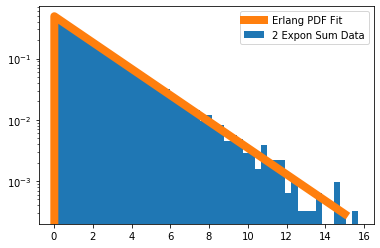

In [4]:
fig, ax = plt.subplots(1,1)
plt.yscale('log')

# Setting up and plotting the Convolution Sum of 2 Exponential PDFs 
# (PDF must sum to 1)

dataEX = np.sort(stats.expon.rvs(size = 10000))
conv = dataEX + dataEX

fit_alpha, fit_loc, fit_beta=stats.gamma.fit(conv)
print('Erlang Fit Parameters:')
print(f'    alpha = {fit_alpha}')
print(f'    loc = {fit_loc}')
print(f'    scale = {fit_beta}')

ax.hist(conv, 50, density=True, label='2 Expon Sum Data')
#plt.xlim([-0.2,0.3])
#plt.ylim(0,40)
x = np.linspace(0, 15, 1000)
ax.plot(x, stats.erlang.pdf(x, a=1, loc=fit_loc, scale=fit_beta), lw=8, label='Erlang PDF Fit')

ax.legend(loc='best')
plt.show()

In [5]:
vals = stats.expon.ppf([0.001, 0.25, 0.50, 0.75, 0.999])
valsG = stats.erlang.ppf([0.001, 0.25, 0.50, 0.75, 0.999], a=1)
np.allclose(stats.expon.cdf(vals), stats.erlang.cdf(valsG, a=1))

True

- I see that my two distributions are equivalent because testing to see if the CDF outputs of the exponential and erlang distributions are equivalent returned an output of "**True**", reinforcing what the graph above shows when it plots two distribution functions that are completely independent of one another
### Problem 2B)
- I want to find the shape of the pdf of the ratio of two zero-mean unity variance gaussian PDFs
  - This ratio takes the form of $X_1 / X_2$ where both distributions are the standard normal distributions that have the following properties:
    - $\mu =$ mean$ = 0$ and $\sigma^2 = $variance$ = 1$
- My research says that a ratio of two independent normal distributions takes the form of a Cauchy distribution
  - I can define the Caucy PDF distribution as $C_{pdf}(x, \mu, \gamma) ={1 \over \pi \gamma }\left[{\gamma ^{2} \over (x-\mu)^{2}+\gamma ^{2}}\right]$
  - I recognize that $\mu$ works the same as $\mu$ in a normal distribution as a location parameter and that the $\gamma$ variable is equivalent to the scale parameter of a normal distribution

Cauchy Fit Parameters:
    loc = -0.013008902577921814
    scale = 0.9855473379816244


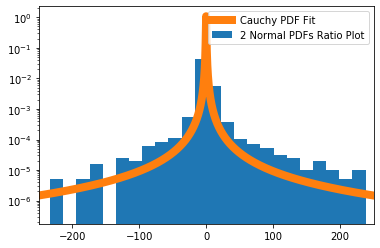

In [15]:
fig, ax = plt.subplots(1,1)
plt.yscale('log')

dataN1 = np.random.normal(loc=0, scale=1, size=10000)
dataN2 = np.random.normal(loc=0.0, scale=1.0, size=10000)
ratio = np.sort((dataN1) / (dataN2))

fit_locN, fit_betaN=stats.cauchy.fit(ratio)
print('Cauchy Fit Parameters:')
print(f'    loc = {fit_locN}')
print(f'    scale = {fit_betaN}')

ax.hist(ratio, 500, density=True, label='2 Normal PDFs Ratio Plot')
plt.xlim([-250,250])
x = np.linspace(-500, 500, 10000)
ax.plot(x, stats.cauchy.pdf(x, loc=fit_loc, scale=fit_beta), lw=8, label='Cauchy PDF Fit')

ax.legend(loc='best')
plt.show()

- Using a fit function with a Cauchy distribution's features, I find that the distribution of 2 Normal PDFs in a ratio is equivalent to a Cauchy distribution PDF like my research said it should be.

### Problem 2C)
- Given randomized, normally distributed data sets $x$ and $y$, plotting them on a 2D Gaussian distribution, I can achieve the graph below. The graph plots points of the form of a vector $V=X\hat{i} + Y\hat{j}$ and I can find these V values using a vector amplitude function of the form:
  - amplitude = $amp=\sqrt{X^2+Y^2}$
- I can take those probability amplitude values, make a histogram of their values, and plot a PDF fit for them after analysis of their plotted form

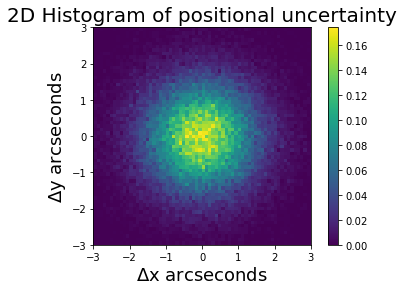

In [17]:
# I make random variates for normally distributed variables and plot them on a 2D Gaussian
x = stats.norm.rvs(scale = 1, size = 100000)
y = stats.norm.rvs(scale = 1, size = 100000)
a = np.vstack((x, y))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:], a[1,:], bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 20)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)

In [18]:
# I define my vector amplitude function here
def amplitude(x, y):
    result = np.sqrt(x**2 + y**2)
    return result
amplitude(x, y)

array([1.8526833 , 0.60365923, 1.03219673, ..., 0.6655238 , 0.2263278 ,
       0.97388611])

Gamma Fit Parameters:
    alpha = 5.1777824308089775
    loc = -0.2681978413871867
    scale = 0.2933521234192108


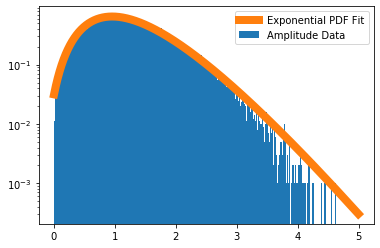

In [20]:
# I plot the histogram and analyze, and repeat with a plotted fit of gamma-distributed PDF
fig, ax = plt.subplots(1,1)
plt.yscale('log')

amp=np.sort(amplitude(x,y))

ax.hist(amp, 500, density=True, label='Amplitude Data')

fit_alpha, fit_loc, fit_beta=stats.gamma.fit(amp)
print('Gamma Fit Parameters:')
print(f'    alpha = {fit_alpha}')
print(f'    loc = {fit_loc}')
print(f'    scale = {fit_beta}')

xaxis = np.sort(np.linspace(0,6,100000))
ax.plot(amp, stats.gamma.pdf(amp, a=fit_alpha, loc=fit_loc, scale=fit_beta), lw=8, label='Exponential PDF Fit')


ax.legend(loc='best')
plt.show()

- I think the gamma distribution fits very well with my given data set, so I can say that the PDF of the amplitude of the 2D gaussian is gamma-distributed